## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [6]:
# Importing the necessary packages
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm # for tracking progress of an iterative loop
import cv2 # for loading of images
from sklearn.metrics import accuracy_score

from google.colab import drive




In [7]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Data  Science/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
df_lbl = pd.read_csv("labels.csv")

In [19]:
df_lbl.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [20]:
df_lbl.shape

(10222, 2)

In [21]:
# Number of categories
len(df_lbl['breed'].unique())
print("The count of each category of dogs in the dataset are:\n", df_lbl['breed'].value_counts())

The count of each category of dogs in the dataset are:
 scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64


### Print the count of each category of Dogs given in the dataset



In [22]:
# As the data is in the form of strings, first, the labels are converted into numbers
Label_Encoder = LabelEncoder()
df_lbl['breed'] = Label_Encoder.fit_transform(df_lbl['breed'])
df_lbl.head()

id  breed
0  000bec180eb18c7604dcecc8fe0dba07     19
1  001513dfcb2ffafc82cccf4d8bbaba97     37
2  001cdf01b096e06d78e9e5112d419397     85
3  00214f311d5d2247d5dfe4fe24b2303d     15
4  0021f9ceb3235effd7fcde7f7538ed62     49

In [0]:
one_hot_labels = tensorflow.keras.utils.to_categorical(df_lbl['breed'])

In [24]:
one_hot_labels.shape

(10222, 120)

### Get one-hot encodings of labels

In [0]:
# As the data is in the form of strings, first, the labels are converted into numbers
Label_Encoder = LabelEncoder()
df_lbl['breed'] = Label_Encoder.fit_transform(df_lbl['breed'])

In [27]:
labels_df.head()

id  breed
0  000bec180eb18c7604dcecc8fe0dba07     19
1  001513dfcb2ffafc82cccf4d8bbaba97     37
2  001cdf01b096e06d78e9e5112d419397     85
3  00214f311d5d2247d5dfe4fe24b2303d     15
4  0021f9ceb3235effd7fcde7f7538ed62     49

In [0]:
# Second, the labels with integer values are converted into one hot encoders

In [0]:
one_hot_labels = tensorflow.keras.utils.to_categorical(df_lbl['breed'])

In [29]:
one_hot_labels.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [30]:
X_train = []
Y_train = []
for f, img in tqdm(labels_df.values): # f for format .jpg
  train_img = cv2.imread('./train/{}.jpg'.format(f), 1)
  label = one_hot_labels[img]
  train_img_resize = cv2.resize(train_img, (128, 128))
  X_train.append(train_img_resize)
  Y_train.append(label)

100%|██████████| 10222/10222 [00:31<00:00, 328.94it/s]


Length of X_train: 10222 
Length of Y_train: 10222


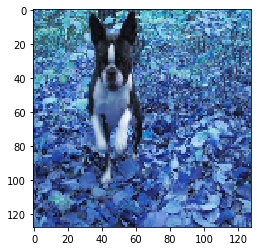

In [31]:
plt.imshow(X_train[0])
Y_train[0]
print("Length of X_train:", len(X_train), "\nLength of Y_train:", len(Y_train))

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
X_train_arr = np.array(X_train) / 255
Y_train_arr = np.array(Y_train)

In [0]:
X_train_arr = X_train_arr.reshape(X_train_arr.shape[0], 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
X_train_data, X_val_data, Y_train_data, Y_val_data = train_test_split(X_train_arr, Y_train_arr, test_size = 0.3, random_state = 79)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [35]:
test_img = pd.read_csv("sample_submission.csv")["id"]
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [0]:
img_rows = 128
img_cols = 128

In [37]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:14<00:00, 697.69it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.array(x_test_feature)/ 255



In [0]:
x_test_feature = x_test_feature.reshape(x_test_feature.shape[0],128,128,3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [40]:
# Clear out tensorflow memory
tensorflow.keras.backend.clear_session()
# Define Model
model = tensorflow.keras.models.Sequential()
# 1st Conv Layer
model.add(tensorflow.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(128, 128, 3)))
# 2nd Conv Layer
model.add(tensorflow.keras.layers.Conv2D(64, (3,3), activation='relu'))
# Flattening the data
model.add(tensorflow.keras.layers.Flatten())
# 1st dense layer
model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
# Output layer
model.add(tensorflow.keras.layers.Dense(120, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
#Training the model
basic_model = model.fit(X_train_data, Y_train_data,
batch_size=128,
epochs=10,
validation_data=(X_val_data, Y_val_data))

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 18s 2ms/sample - loss: 6.6982 - acc: 0.0345 - val_loss: 4.1116 - val_acc: 0.0401
Epoch 2/10
7155/7155 [==============================] - 10s 1ms/sample - loss: 3.8964 - acc: 0.0822 - val_loss: 4.0014 - val_acc: 0.0522
Epoch 3/10
7155/7155 [==============================] - 10s 1ms/sample - loss: 3.3210 - acc: 0.1957 - val_loss: 4.1650 - val_acc: 0.0463
Epoch 4/10
7155/7155 [==============================] - 10s 1ms/sample - loss: 1.8893 - acc: 0.5430 - val_loss: 4.7864 - val_acc: 0.0404
Epoch 5/10
7155/7155 [==============================] - 10s 1ms/sample - loss: 0.5309 - acc: 0.8840 - val_loss: 6.7070 - val_acc: 0.0443
Epoch 6/10
7155/7155 [==============================] - 10s 1ms/sample - loss: 0.0899 - acc: 0.9871 - val_loss: 7.6938 - val_acc: 0.0381
Epoch 7/10
7155/7155 [==============================] - 10s 1ms/sample - loss: 0.0296 - acc: 0.9983 - val_loss: 8.2094 - val_acc: 

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
rotation_range=90,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
horizontal_flip=True,
zoom_range=0.2,
shear_range=0.2)
val_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train_data, y=Y_train_data)
val_generator = train_datagen.flow(X_train_data, y=Y_train_data)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [45]:
model.fit_generator(train_generator, epochs=10, steps_per_epoch=200,
validation_data=val_generator, validation_steps=200)

Epoch 1/10
200/200 [==============================] - 50s 251ms/step - loss: 4.2195 - acc: 0.0276 - val_loss: 4.1092 - val_acc: 0.0294
Epoch 2/10
200/200 [==============================] - 49s 245ms/step - loss: 4.1214 - acc: 0.0323 - val_loss: 4.1090 - val_acc: 0.0311
Epoch 3/10
200/200 [==============================] - 49s 246ms/step - loss: 4.1195 - acc: 0.0320 - val_loss: 4.1052 - val_acc: 0.0353
Epoch 4/10
200/200 [==============================] - 49s 247ms/step - loss: 4.1175 - acc: 0.0317 - val_loss: 4.1002 - val_acc: 0.0353
Epoch 5/10
200/200 [==============================] - 49s 246ms/step - loss: 4.1137 - acc: 0.0305 - val_loss: 4.1256 - val_acc: 0.0298
Epoch 6/10
200/200 [==============================] - 49s 245ms/step - loss: 4.1088 - acc: 0.0329 - val_loss: 4.1074 - val_acc: 0.0353
Epoch 7/10
200/200 [==============================] - 49s 245ms/step - loss: 4.1052 - acc: 0.0337 - val_loss: 4.1015 - val_acc: 0.0328
Epoch 8/10
200/200 [==============================] - 4

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input




In [0]:
project_path = "/content/drive/My Drive/Data  Science/DogBreed_Classification/"

In [52]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights='imagenet',
                 include_top=False, pooling='avg')





58892288/58889256 [==============================] - 1s 0us/step








Print the summary of the base_model

In [53]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:

from keras.layers import Input
input = Input(shape=(128,128,3),name = 'image_input')
output_vgg16 = base_model(input)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [56]:
newmodel = Dense(1024, activation='relu', name='ds1',use_bias=False, kernel_initializer='uniform')(output_vgg16)
newmodel = BatchNormalization()(newmodel)
newmodel = Dense(256, activation='relu', name='ds2')(newmodel)
newmodel=  Dropout(0.3)(newmodel)
newmodel = Dense(120, activation='softmax', name='predictions',kernel_initializer='uniform')(newmodel)

NameError: ignored

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in base_model.layers:
  #if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in base_model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

In [0]:
mymodel = Model(input=input, output=newmodel)

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
# Final model
final_model = tensorflow.keras.models.Model(base_model.input, vgg16_model)

# Loss and Optimizer
final_model.compile(loss = "categorical_crossentropy", optimizer= 'adam', metrics=["accuracy"])

# Training the model
final_model = final_model.fit(X_train_data, Y_train_data,batch_size=128,epochs=10,validation_data=(X_val_data, Y_val_data))